# Table of Contents

[Questionnaire only](#Questionnaire-only)
  - [Can the answers to the scientific questions be used to predict if the questionnaire was filled before or after the game?](#Can-the-answers-to-the-scientific-questions-be-used-to-predict-if-the-questionnaire-was-filled-before-or-after-the-game?)
    - [If scientific questions are coded by answers](#If-scientific-questions-are-coded-by-answers)
    - [If scientific questions are coded by correctedness](#If-scientific-questions-are-coded-by-correctedness)
[RedMetrics only](#RedMetrics-only)
  - [Can the score of a player be predicted with their RedMetrics data](#Can-the-score-of-a-player-be-predicted-with-their-RedMetrics-data)

[Questionnaire and RedMetrics](#Questionnaire-and-RedMetrics)
  - [Can the biology level of a player be predicted using the game data?](#Can-the-biology-level-of-a-player-be-predicted-using-the-game-data?)
  - [Can the gaming profile of a player be predicted using the game data?](#Can-the-gaming-profile-of-a-player-be-predicted-using-the-game-data?)
  - [Can the completion time of each chapter be used to predict if a player is going to answer a specific scientific question correctly](#Can-the-completion-time-of-each-chapter-be-used-to-predict-if-a-player-is-going-to-answer-a-specific-scientific-question-correctly)
  - [Can the game data be used to predict the performance on a sub-group of scientific questions?](#Can-the-game-data-be-used-to-predict-the-performance-on-a-sub-group-of-scientific-questions?)
    - [Using an arbitrary classification of questions](#Using-an-arbitrary-classification-of-questions)
      - [Hard questions](#Hard-questions)
      - [Biobrick symbol recognition](#Biobrick-symbol-recognition)
      - [Easy questions](#Easy-questions)
    - [Using Bloom's taxonomy](#Using-Bloom's-taxonomy)
      - [knowledge questions](#knowledge-questions)
      - [comprehension questions](#comprehension-questions)
      - [application questions](#application-questions)
      - [analysis questions](#analysis-questions)
      - [synthesis questions](#synthesis-questions)
  - [Can the completion time be predicted from questionnaire answers?](#Can-the-completion-time-be-predicted-from-questionnaire-answers?)
    - [From the before questionnaire](#From-the-before-questionnaire)
    - [From the after questionnaire](#From-the-after-questionnaire)

In [1]:
%run dataFormating.ipynb

rmdfTestUsers read_csv success (1/3)
rmdf1522 read_csv success (2/3)
rmdf160 read_csv success (3/3)
gform read_csv success
gformFR read_csv success
temporalities set (user answer method)


IntProgress(value=0, max=1708)

IntProgress(value=0, max=854)

profile info set
t test: statistic=0.44942302738150924 pvalue=0.6535321184726215
t test: statistic=-0.1969960360612056 pvalue=0.8439549239305393
t test: statistic=-0.8852450320296444 pvalue=0.37654209947548145


FloatProgress(value=0.0, max=126.0)

dataFormating.ipynb:16: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  "rmdf160 read_csv success (3/3)\n",
dataFormating.ipynb:16: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  "rmdf160 read_csv success (3/3)\n",


In [2]:
import sklearn
print (sklearn.__version__)

0.19.1


In [3]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LassoCV, Lasso

from ipywidgets import FloatProgress
from IPython.display import display

from math import *

from scipy import stats
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import boxplot

# Questionnaire only

## Can the answers to the scientific questions be used to predict if the questionnaire was filled before or after the game?

Note: I am using only decision tree methods here because other methods like naive bayes do not make sense on categorical data

### If scientific questions are coded by answers

In [4]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defForms.loc[:, scientificColumns]
target = defForms["temporality"].astype('int') 

In [5]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.8564814814814815

In [6]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9212962962962963

In [7]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9074074074074074

Conclusion: Accuracy is around 85%. Not bad but we expected better (17/01/2018)

## If scientific questions are coded by correctedness

In [8]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defCorrectedForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defCorrectedForms.loc[:, scientificColumns]
target = defCorrectedForms["temporality"].astype('int') 

In [9]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.9206349206349206

In [10]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9563492063492062

In [11]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9484126984126983

Conclusion: Accuracy is around 80%. Not bad but we expected better (19/12/2017)

# RedMetrics only

In [12]:
allDataClassif.columns

Index(['sessionsCount', 'scorepretest', 'scoreposttest', 'scoreundefined',
       'complete', 'configure', 'craft', 'death', 'equip', 'unequip', 'add',
       'remove', 'gotourl', 'pickup', 'reach', 'restart', 'selectmenu',
       'start', 'scoredelta', 'maxChapter', 'efficiency', 'thoroughness',
       'fun', 'completionTime', 'ch00completion', 'ch01completion',
       'ch02completion', 'ch03completion', 'ch04completion', 'ch05completion',
       'ch06completion', 'ch07completion', 'ch08completion', 'ch09completion',
       'ch10completion', 'ch11completion', 'ch12completion', 'ch13completion',
       'ch14completion', 'ch00total', 'ch01total', 'ch02total', 'ch03total',
       'ch04total', 'ch05total', 'ch06total', 'ch07total', 'ch08total',
       'ch09total', 'ch10total', 'ch11total', 'ch12total', 'ch13total',
       'ch14total', 'totalTime', 'Want to learn more about Biology',
       'Want to learn more about Synthetic biology',
       'Want to learn more about Video games',
       

## Can the score of a player be predicted with their RedMetrics data

In [13]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0].drop("scoreposttest", axis = 1)
target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([0.95792436, 0.95870436, 0.92430117, 0.95963273, 0.93239226,
       0.94156652, 0.96585628, 0.96108899, 0.94558179, 0.93819122])

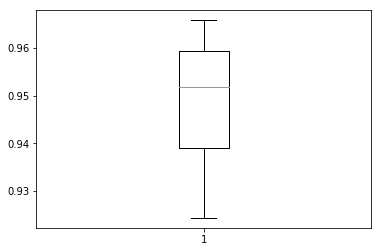

In [14]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Score cannot be predicted by the table of RedMetrics data (30/01/2018)

In [15]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0].drop("scoreposttest", axis = 1)
target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([0.95885036, 0.95840945, 0.87157498, 0.95566104, 0.92806126,
       0.91874997, 0.96721262, 0.92838738, 0.93863788, 0.94276934])

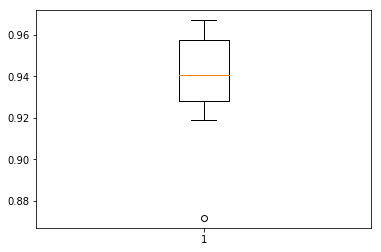

In [16]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Score cannot be predicted by the table of RedMetrics data + second degree polynomial (30/01/2018)

Let's try by reducing the number of features

In [18]:
stemTimesCriteria = ["ch" + "{0:0=2d}".format(i) for i in range(0,15)]
completionTimesCriteria = [st + "completion" for st in stemTimesCriteria] + ["completionTime"]
totalTimesCriteria = [st + "total" for st in stemTimesCriteria] + ["totalTime"]

In [20]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0]

features = features[["craft", "death", "add", "remove", "reach", "maxChapter"] + totalTimesCriteria + completionTimesCriteria]
target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([ 0.46064487,  0.45458288,  0.25115755, -0.35587615,  0.38981378,
        0.40546878,  0.36476547,  0.29801271, -0.17636958,  0.68682496])

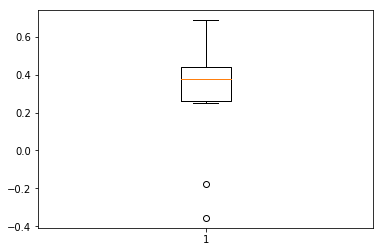

In [21]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Tried different combinations, but cannot find any interesting regression (02/02/2018)

# Questionnaire and RedMetrics

## Can the biology level of a player be predicted using the game data?

In [22]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0]
features = features.loc[:,"sessionsCount":"completionTime"]
target = anonymousData[anonymousData["scoreposttest"] >= 0]["biologyStudy"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([-7.54828433e-02, -2.60318809e-01, -3.58352892e-02, -1.27990098e+00,
       -6.31793969e-01, -1.24716109e-01, -4.24168975e-03, -5.07707598e-02,
       -5.13244460e-01, -1.10352904e-03])

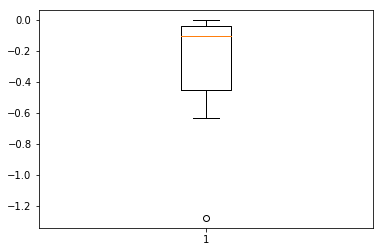

In [23]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the gaming profile of a player be predicted using the game data?

In [24]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData.loc[:,"sessionsCount":"completionTime"]
target = sum(anonymousData["gameInterest"], anonymousData["gameFrequency"])

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([-8.72789009e-03, -3.19017570e-02, -3.61235227e-04, -4.31011923e-01,
       -5.93004313e-02, -3.61235227e-04, -8.27419426e-02, -1.08546219e-01,
       -2.35774342e-01, -1.08546219e-01])

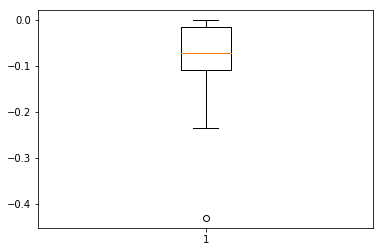

In [25]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the completion time of each chapter be used to predict if a player is going to answer a specific scientific question correctly

In [26]:
# Given a question tag, plot scores of cross-validated model
def tryClassification(data, scientificQuestion):
    # Remove id
    anonymousData = data.drop("anonymousID", axis = 1)

    # Get features and target
    # Only select rows where scoreafter is not negative
    features = anonymousData[anonymousData["scoreposttest"] >= 0]
    features = features.iloc[:,24:37]
    target = anonymousData[anonymousData["scoreposttest"] >= 0].loc[:,scientificQuestion].astype('int')

    # Add polynomial features
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    features = secondDegreeFeatures.fit_transform(features)

    # Center and scale data
    features = preprocessing.scale(features)
    
    # Classify using extra tree classifiers, more random than random forest methods
    clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
    scores = cross_val_score(clf, features, target, cv=5)
    
    # Display plot
    fig, ax = plt.subplots()
    boxplot(scores)
    
    return [scores.mean(), scores.std()]

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: Use

C:\Users\Mikael\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Mikael\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.

,QGenotypePhenotype,QBioBricksDevicesComposition,QAmpicillin,QBBNamePlasmid,QBBFunctionTER,QBBNamePromoter,QBBFunctionGameCDS,QBBNameTerminator,QBBFunctionBiologyCDS,QBBNameRBS,...,QDevicePconsRbsFlhdcTer,QDevicePbadRbsGfpTer,QDevicePbadGfpTbsTer,QDeviceGfpRbsPconsTer,QDevicePconsGfpRbsTer,QDeviceAmprRbsPconsTer,QDeviceRbsPconsAmprTer,QGreenFluorescence,QUnequipDevice,QDevicePbadRbsAraTer
Mean,0.762333,0.685103,0.650769,0.716026,0.685462,0.753205,0.832923,0.560256,0.801282,0.873231,...,0.714923,0.809538,0.738769,0.713026,0.739077,0.754667,0.770154,0.591667,0.592949,0.849231
Var,0.031985,0.109383,0.063893,0.078289,0.105713,0.023640,0.040349,0.122792,0.007851,0.013538,...,0.060106,0.015519,0.061016,0.071670,0.073109,0.050150,0.067437,0.108475,0.078771,0.029705


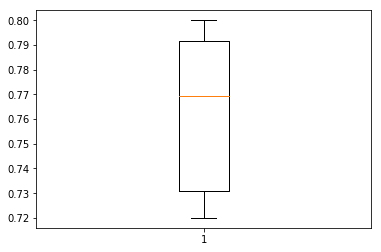

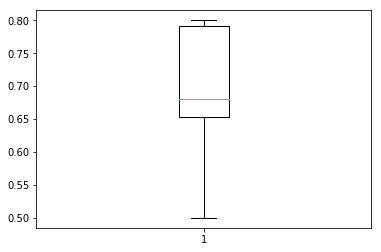

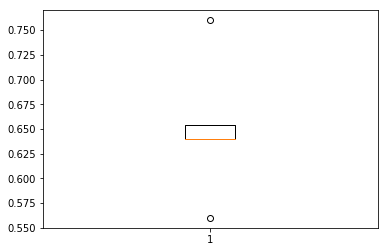

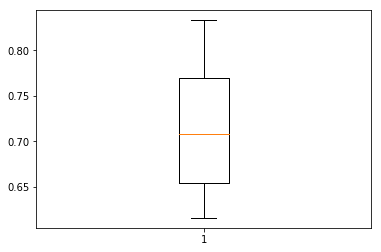

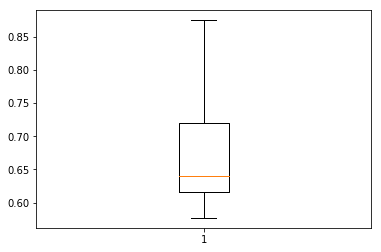

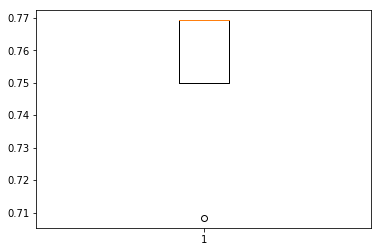

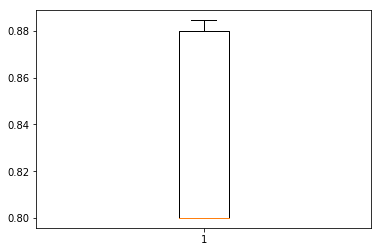

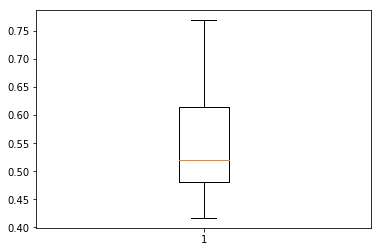

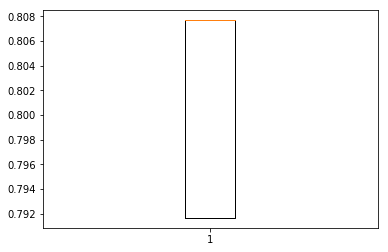

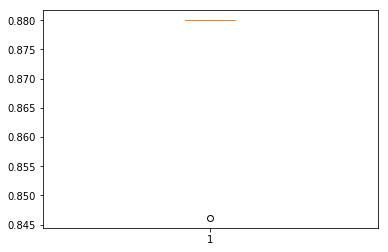

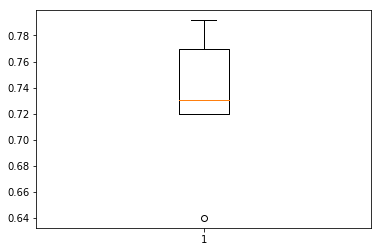

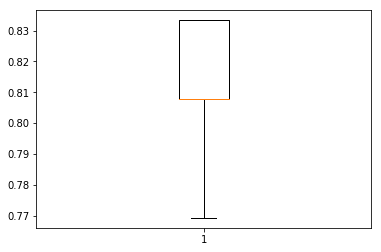

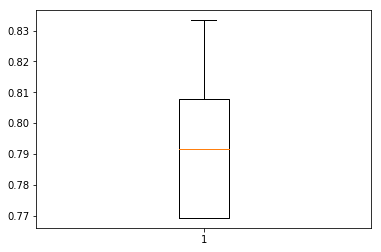

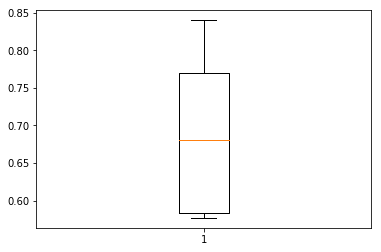

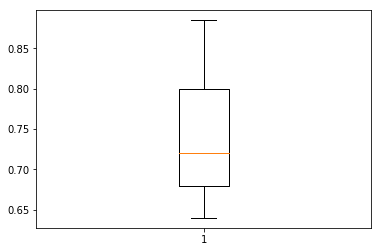

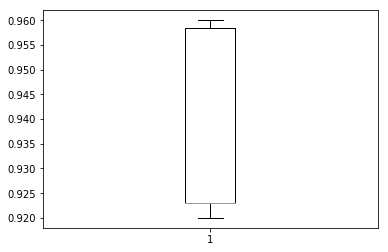

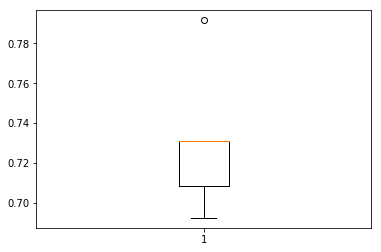

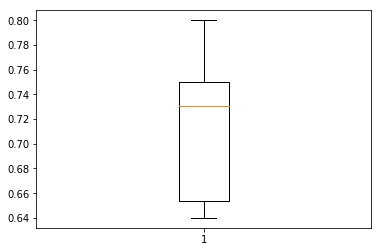

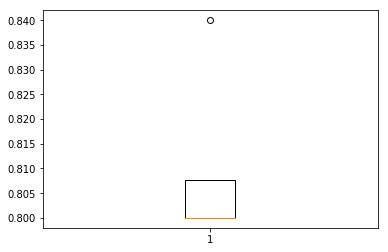

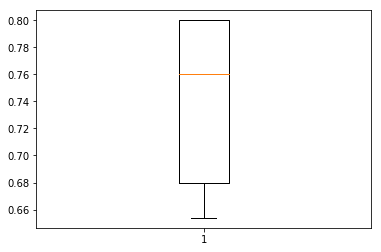

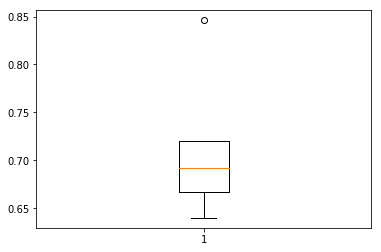

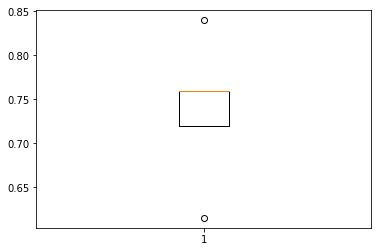

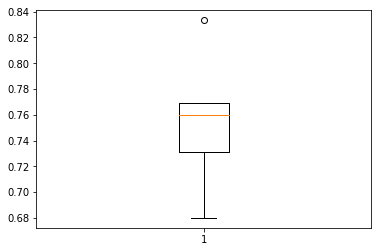

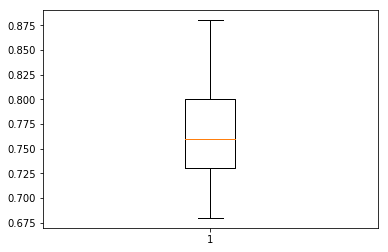

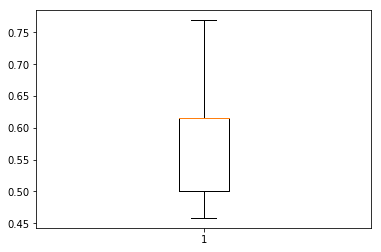

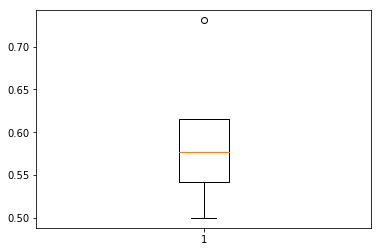

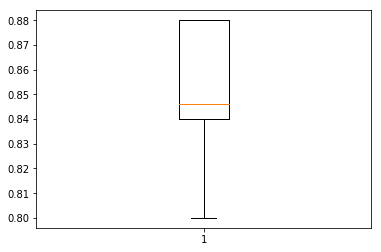

In [27]:
allScores = pd.DataFrame(index = ["Mean", "Var"])
for question in ["QGenotypePhenotype", "QBioBricksDevicesComposition", "QAmpicillin", "QBBNamePlasmid", "QBBFunctionTER", "QBBNamePromoter", "QBBFunctionGameCDS", "QBBNameTerminator", "QBBFunctionBiologyCDS", "QBBNameRBS", "QBBExampleCDS", "QBBNameCDS", "QBBFunctionPR", "QBBFunctionRBS", "QBBFunctionPlasmid", "QBBNameOperator", "QDeviceRbsPconsFlhdcTer", "QDevicePconsRbsFlhdcTer", "QDevicePbadRbsGfpTer", "QDevicePbadGfpTbsTer", "QDeviceGfpRbsPconsTer", "QDevicePconsGfpRbsTer", "QDeviceAmprRbsPconsTer", "QDeviceRbsPconsAmprTer", "QGreenFluorescence", "QUnequipDevice", "QDevicePbadRbsAraTer"]:
    questionTag = question
    scores = tryClassification(gameAndCorrectedAfterDataClassif, questionTag)
    allScores[questionTag] = scores
allScores

Conclusion: Redmetrics can be used to predict answers to certain scientific questions (29/05/2018)
TODO Raphael: Check which questions you want additional analysis for

## Can the game data be used to predict the performance on a sub-group of scientific questions?

In [28]:
def getBoxplot(scores, title = ''):
    # figure related code
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(scores)
    ax.set_title(title)

In [48]:
#pd.concat([anonymousData.loc[:,"sessionsCount":"completionTime"], anonymousData.loc[:,"gameInterest":"previousPlay"]], axis=1).columns

In [65]:
# boxplot function
#  questions: array of strings of question names
def getPerformanceFromQuestionGroup(questions,
                                    thresholdPercentage = 1.0,
                                    extraTreesClassifier = False,
                                    randomForestClassifier = False,
                                    lasso = False,
                                    histTarget = 0
                                   ):
    # Remove id
    anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

    # Get features and target
    features = pd.concat([anonymousData.loc[:,"sessionsCount":"completionTime"], anonymousData.loc[:,"gameInterest":"previousPlay"]], axis=1)
    
    digitalTarget = anonymousData.loc[:, questions].astype(int).sum(axis=1)
    categoricalTarget = digitalTarget.apply(lambda x: 0 if x < thresholdPercentage*len(questions) else 1)

    # Add polynomial features
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    features = secondDegreeFeatures.fit_transform(features)

    # Center and scale data
    features = preprocessing.scale(features)

    if extraTreesClassifier:
        # Classify using extra tree classifiers, more random than random forest methods
        clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
        scores = cross_val_score(clf, features, categoricalTarget, cv=10)
        print("ExtraTreesClassifier scores mean: " + str(scores.mean()))

        # Display plot
        getBoxplot(scores, "ExtraTreesClassifier boxplot")
        
    if randomForestClassifier:
        # Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
        clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
        scores = cross_val_score(clf, features, categoricalTarget)
        print("RandomForestClassifier scores mean: " + str(scores.mean()))

        # Display plot
        getBoxplot(scores, "RandomForestClassifier boxplot")
        
    if lasso:
        # Run Lasso regression with cross-validation
        model = Lasso()
        scores = cross_val_score(model, features, digitalTarget, cv=10)
        print("Lasso scores mean: " + str(scores.mean()))

        # Display plot
        getBoxplot(scores, "Lasso boxplot")
        
    if histTarget > 0:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.hist(target, bins = range(histTarget))

### Using an arbitrary classification of questions

#### Hard questions

ExtraTreesClassifier scores mean: 1.0
RandomForestClassifier scores mean: 1.0
Lasso scores mean: -0.28088669699719054


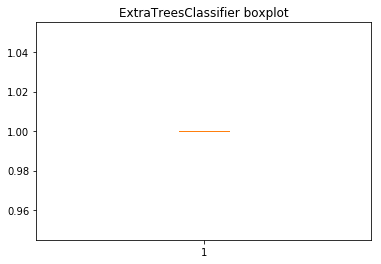

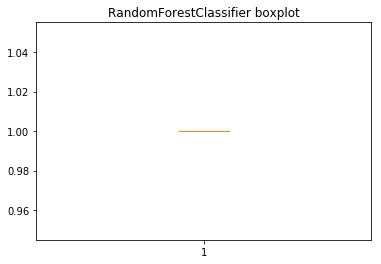

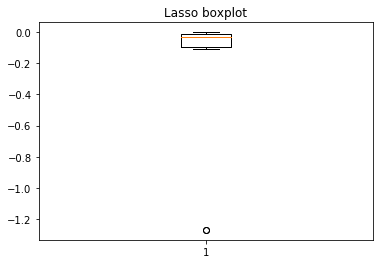

In [66]:
hardQuestions = ["QBBFunctionPR", "QBBNameOperator", "QDevicePbadRbsAraTer"]
getPerformanceFromQuestionGroup(hardQuestions, extraTreesClassifier = True, randomForestClassifier = True, lasso = True)

Conclusion: Very high quality prediction (29/05/18)

### Biobrick symbol recognition

ExtraTreesClassifier scores mean: 1.0
RandomForestClassifier scores mean: 1.0
Lasso scores mean: 0.5963148938345528


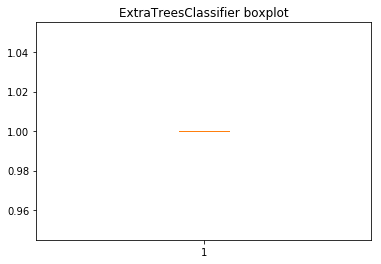

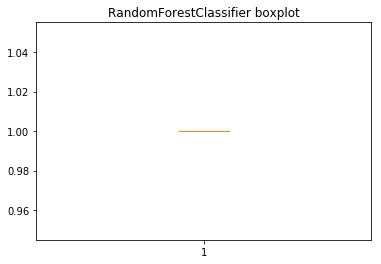

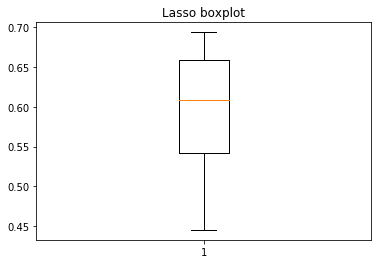

In [67]:
bbSymbolRecognition = ["QBBNamePlasmid", "QBBFunctionTER", "QBBNamePromoter", "QBBFunctionGameCDS", "QBBNameTerminator", "QBBFunctionBiologyCDS", "QBBNameRBS", "QBBExampleCDS", "QBBNameCDS", "QBBFunctionPR", "QBBFunctionRBS", "QBBFunctionPlasmid", "QBBNameOperator"]
getPerformanceFromQuestionGroup(bbSymbolRecognition, extraTreesClassifier = True, randomForestClassifier = True, lasso = True)

Conclusion: No apparent possible prediction (1/02/2018)

### Easy questions

ExtraTreesClassifier scores mean: 0.8074175824175824
RandomForestClassifier scores mean: 0.7936507936507936
Lasso scores mean: -0.23768933464830147


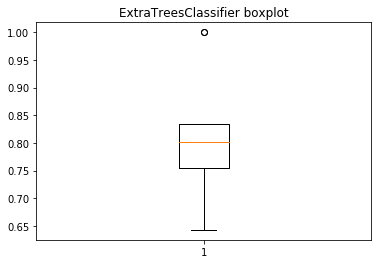

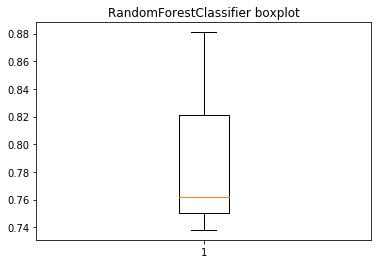

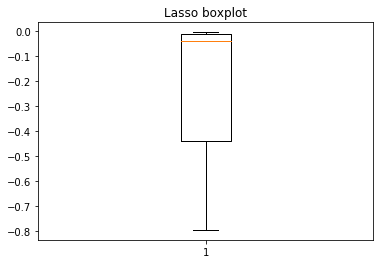

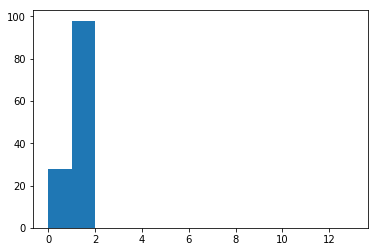

In [68]:
easyQuestions = ["QBioBricksDevicesComposition", "QDeviceRbsPconsFlhdcTer", "QGreenFluorescence"]
getPerformanceFromQuestionGroup(easyQuestions, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

Conclusion: Inconclusive (01/02/2018)

### Using Bloom's taxonomy

Not interpreted yet.

#### knowledge questions

ExtraTreesClassifier scores mean: 1.0
RandomForestClassifier scores mean: 1.0
Lasso scores mean: 0.01818468271267093


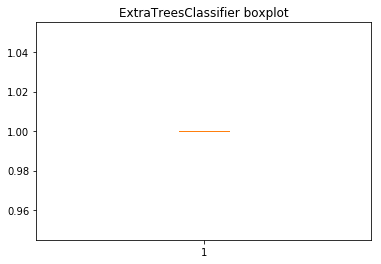

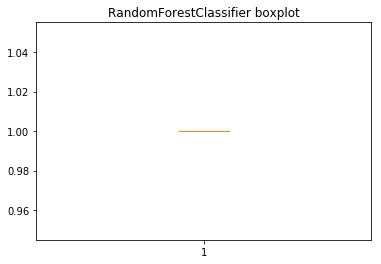

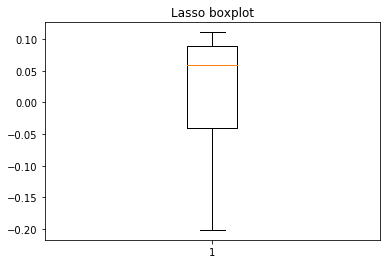

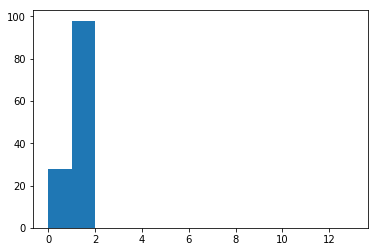

In [69]:
knowledgeQuestions = ["QAmpicillin",
                      "QBBNamePlasmid",
                      "QBBNamePromoter",                      
                      "QBBNameTerminator",
                      "QBBNameRBS",
                      "QBBNameCDS",
                      "QBBNameOperator",
                     ]
getPerformanceFromQuestionGroup(knowledgeQuestions, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

#### comprehension questions

ExtraTreesClassifier scores mean: 0.8401515151515151
RandomForestClassifier scores mean: 0.8096363521774753
Lasso scores mean: 0.05679690125089622


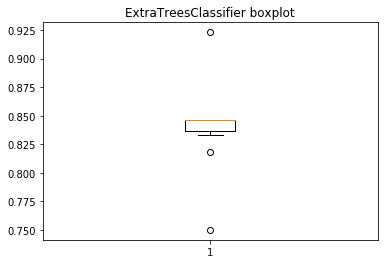

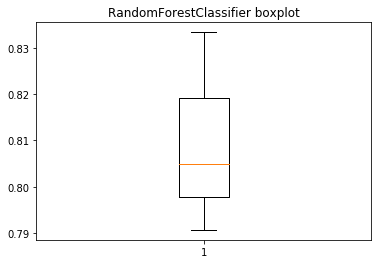

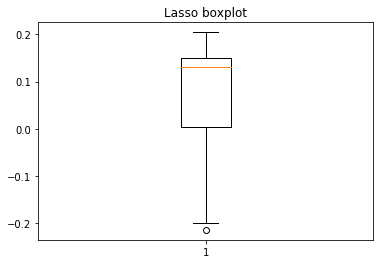

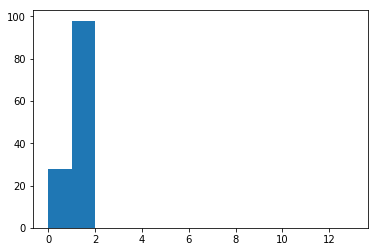

In [70]:
comprehensionQuestions = ["QBioBricksDevicesComposition",
                      "QBBFunctionTER",
                      "QBBFunctionPlasmid",                      
                      "QUnequipDevice",
                     ]
getPerformanceFromQuestionGroup(comprehensionQuestions, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

#### application questions

ExtraTreesClassifier scores mean: 0.8344988344988344
RandomForestClassifier scores mean: 0.7857142857142856
Lasso scores mean: -0.2759909100138486


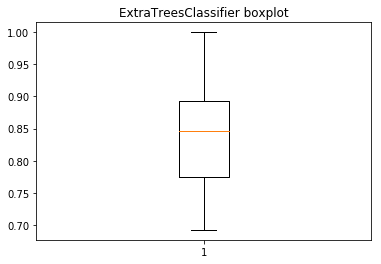

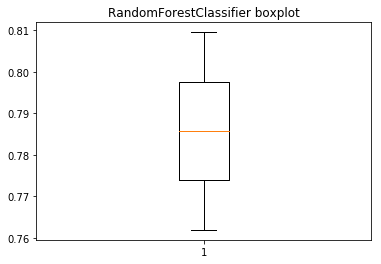

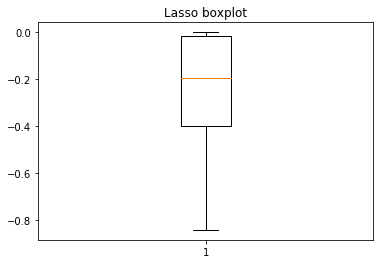

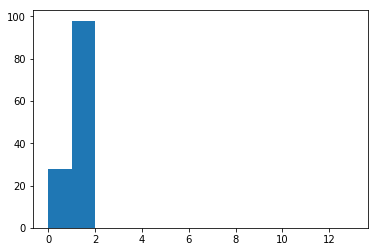

In [71]:
applicationQuestions = ["QGenotypePhenotype",
                      "QBBExampleCDS",
                      "QGreenFluorescence",
                     ]
getPerformanceFromQuestionGroup(applicationQuestions, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

#### analysis questions

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


ExtraTreesClassifier scores mean: 0.9928571428571429
RandomForestClassifier scores mean: 0.9922480620155039
Lasso scores mean: -0.12911558127977382


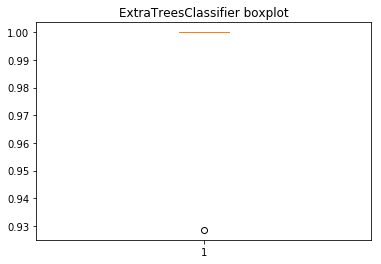

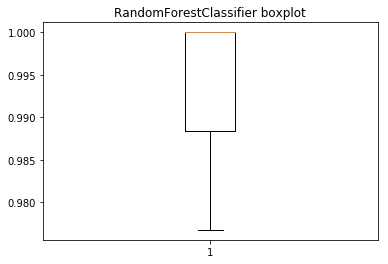

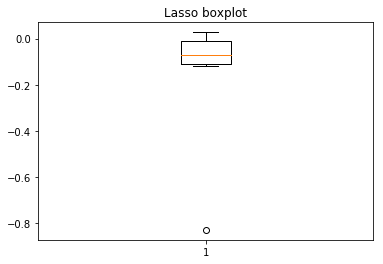

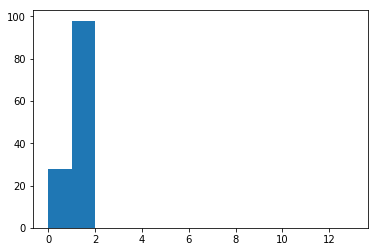

In [72]:
analysisQuestions = ["QBBFunctionGameCDS",
                      "QBBFunctionBiologyCDS",
                      "QBBFunctionPR",
                      "QBBFunctionRBS",
                      "QDevicePbadRbsAraTer",
                     ]
getPerformanceFromQuestionGroup(analysisQuestions, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

#### synthesis questions

ExtraTreesClassifier scores mean: 0.8974358974358972
RandomForestClassifier scores mean: 0.8338420261279024
Lasso scores mean: 0.6404836000873942


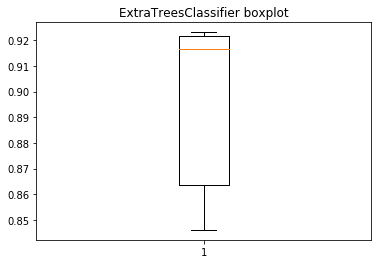

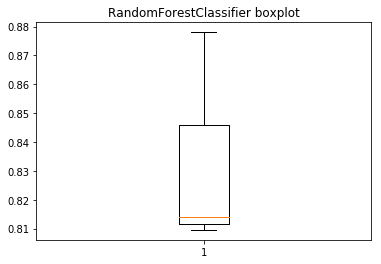

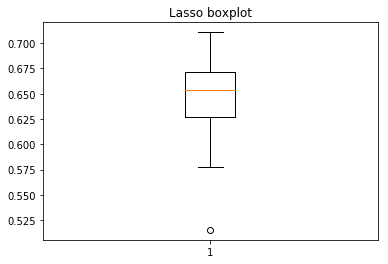

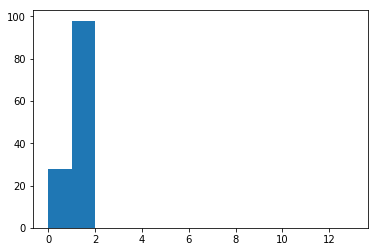

In [73]:
synthesisQuestions = ["QDeviceRbsPconsFlhdcTer",
                      "QDevicePconsRbsFlhdcTer",
                      "QDevicePbadRbsGfpTer",                      
                      "QDevicePbadGfpTbsTer",
                      "QDeviceGfpRbsPconsTer",
                      "QDevicePconsGfpRbsTer",
                      "QDeviceAmprRbsPconsTer",
                      "QDeviceRbsPconsAmprTer",
                     ]
getPerformanceFromQuestionGroup(synthesisQuestions, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

## Can the completion time be predicted from questionnaire answers?

### From the before questionnaire

In [74]:
# Remove id
anonymousData = gameAndCorrectedBeforeDataClassif.drop("anonymousID", axis = 1)

# Get features and target
lastColumn = 'gender_Male'
for potentialLastColumn in ['gender_Other', 'gender_Prefer not to say']:
    if potentialLastColumn in anonymousData.columns:
        lastColumn = potentialLastColumn
features = anonymousData.loc[:,"gameInterest":lastColumn]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

-0.11978987371262875

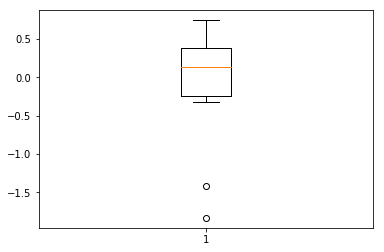

In [75]:
# Run Lasso regression with cross-validation
model = Lasso(max_iter=10000, alpha=10)
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

0.7777777777777778

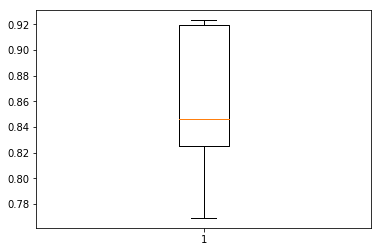

In [76]:
# Try classification
target = target.apply(lambda x: 0 if x < 7200 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()
sum(target)/len(target)

Conclusion: No (01/02/2018)

### From the after questionnaire

In [77]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
lastColumn = 'gender_Male'
for potentialLastColumn in ['gender_Other', 'gender_Prefer not to say']:
    if potentialLastColumn in anonymousData.columns:
        lastColumn = potentialLastColumn
features = anonymousData.loc[:,"gameInterest":lastColumn]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

-0.12220273241454782

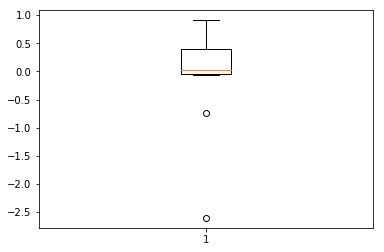

In [78]:
# Run Lasso regression with cross-validation
model = Lasso(max_iter=1000000)
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

0.8741258741258742

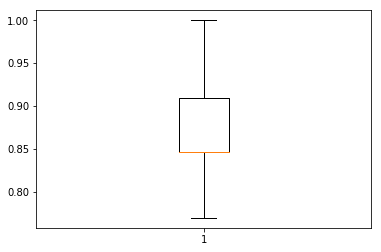

In [79]:
# Try classification
target = target.apply(lambda x: 0 if x < 7200 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()

Conclusion: Yes (29/05/18)

In [80]:
sum(target)

98

In [81]:
len(target)

126

Conclusion: Yes but very unbalanced classes (29/05/18)